##                                             INTRODUCTION: SALES DATA ANALYSIS
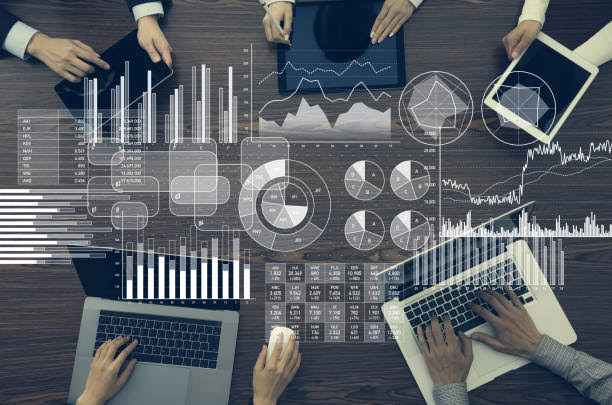

The project is aimed at reviewing the business sales data of the year 2019,consisting of 12 csv files from Jan. to Dec. to identify trends and patterns.<br>
The Project is divided into two phases.Phase one involves a little exploratory data analysis (EDA) process and then a thorough cleanup and transformation of the data for analysis purposes.Phase two is the analysis process where the full power of the python libraries such as pandas and plotly are brought to bare to give answers to the five(5) business problem statements.

## PROBLEM STATEMENTS
1. What was the best month for sales,and how much was earned during that month ?<br>
2. What are the cities with the highest sales ?<br>
3. What time should we display advertisements to maximize the likelihood of customer’s buying product ?<br>
4. What products are most often sold together ?<br>
5. What products were ordered the most and why do you think they were ordered the most ?

Insights to every business problem statement is documented below each visual answering that question.Every line of syntax has been commented on for easy readability and comprehension.

In [123]:
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import pandas as pd
import datetime as dt

import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

import os

In [124]:
#Concatenating all sales csv files into one dataframe.
files = [file for file in os.listdir('./Dataset')]

#Creating an empty dataframe that will store all months of sales data.
sales_data = pd.DataFrame()

#Iterating through each month of sales data
for file in files:
    df = pd.read_csv('./Dataset/'+file) #Reading all of the dataframes
    sales_data = pd.concat([sales_data, df])

In [125]:
sales_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8334,256144,Bose SoundSport Headphones,1,99.99,09/13/19 17:47,"505 1st St, Boston, MA 02215"
1149,249257,Macbook Pro Laptop,1,1700,09/07/19 19:15,"807 10th St, New York City, NY 10001"
11593,247758,34in Ultrawide Monitor,1,379.99,08/07/19 14:28,"857 6th St, San Francisco, CA 94016"
1739,249815,Apple Airpods Headphones,1,150,09/13/19 07:59,"400 7th St, New York City, NY 10001"
12828,235190,34in Ultrawide Monitor,1,379.99,07/01/19 21:31,"697 Johnson St, Boston, MA 02215"


### BRIEF EDA OF THE DATAFRAME

In [126]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [127]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# PHASE 1: DATA CLEANING

### HANDLING THE DUPLICATES WITHIN THE DATAFRAME

In [128]:
#Getting the total number of duplicates
sales_data.duplicated().sum()

1162

In [129]:
#Viewing the duplicates,either the first or last row
sales_data[sales_data.duplicated(keep='first')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11574,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
11621,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [130]:
#Removing the duplicates
sales_data = sales_data.drop_duplicates().reset_index(drop=True)

### HANDLING THE NULL VALUES

In [131]:
#Getting the columns and a sum of their null values
sales_data.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [132]:
#Getting all rows with complete null values.
sales_data[sales_data.isna().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#DELETING
#dropna(how='any') is used for rows with any null values.
#dropna(how='all') is used for rows filled totally with null values.

#Removing rows with null values and reseting the index also.
sales_data = sales_data.dropna(how='all').reset_index(drop=True)

### NORMALIZING COLUMN DATA TYPE

In [134]:
#Getting the columns and their data types
sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Quantity Ordered COLUMN CLEAN UP

In [135]:
#Getting the Datatype
sales_data['Quantity Ordered'].dtype

dtype('O')

In [136]:
#Getting the Unique Values
sales_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [137]:
#Getting the rows with the unique values of 'quantity ordered' in the quantity column
sales_data.loc[sales_data['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [138]:
#Deleting the rows due to the wrong data found in it
sales_data = sales_data.drop(index=516)

In [139]:
#Converting to an integer
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])

#### PRICE EACH COLUMN

In [140]:
#Getting the Datatype
sales_data['Price Each'].dtype

dtype('O')

In [141]:
#Getting the unique values
sales_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [142]:
#Converting to a float
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

## AUGMENTING DATAFRAME WITH ADDITIONAL COLUMNS

#### SPLITING THE PURCHASE ADDRESSS COLUMN TO GET STREET ADDRESS,CITY AND STATE COLUMNS

In [143]:
#Getting street address,city and state column
sales_data[['Street_Address','City','States']] = sales_data['Purchase Address'].str.split(',',2,expand=True)

In [144]:
#An alternative method to split the states column to state and zipcode columns
new = sales_data['States'].str.split(" ",n=2,expand=True)
sales_data['State'] = new[1]
sales_data['Zip-Code'] = new[2]

In [145]:
#Deleting the States and Purchase Address columns
sales_data.drop(columns = {'States','Purchase Address'},inplace=True)

#### SPLITING THE ORDER DATE COLUMN 
Columns extracted from the order date column include,month number,month name,day number,day name and week number

In [146]:
#Getting date and time column from order date column
new = sales_data['Order Date'].str.split(" ",n=2,expand=True)
sales_data['Date'] = new[0]
sales_data['Time'] = new[1]

In [147]:
#Extracting the month number from the order date column.
sales_data['Month Number'] = sales_data['Order Date'].str[0:2]

#Changing the Order Date datatype from object to datetime in other to be able to get the month name from the order date.
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

#Extracting the month name from the order date column.
sales_data['Month Name'] = sales_data['Order Date'].dt.strftime('%b')

#Extracting day number from order date column.
sales_data['Day Number'] = pd.DatetimeIndex(sales_data['Order Date']).day

#Extracting day name from order date column.
sales_data['Day Name'] = sales_data['Order Date'].dt.strftime('%a')

#Extracting week number from order date column
sales_data['Week Number'] = pd.DatetimeIndex(sales_data['Order Date']).week

In [148]:
#Extracting Hour and Minute from the Order date column
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute

#### ADDING A SALES COLUMN TO THE DATAFRAME

In [149]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

#### CLEANING THE DATE COLUMN

In [150]:
sales_data['Date'] = sales_data['Date'].str.replace('/','-')

#### REARRANGING OF COLUMNS USING INDEXING FORMAT

In [151]:
cols = list(sales_data.columns.values)
sales_data = sales_data[cols[0:4] + [cols[-1]] + cols[4:11] + [cols[-3]] + [cols[-2]] + cols[11:16]]

In [152]:
#Deleting the order date column has all required data has been extracted from it
sales_data.drop(columns={'Order Date'},inplace=True)

#### REPLACING ABBREVIATED STATE NAMES WITH FULL NAMES

In [153]:
sales_data = sales_data.replace({'State':{'TX':'Texas','MA':'Massachusetts','CA':'California','WA':'Washington',
                                 'GA':'Georgia','NY':'New York','OR':'Oregon','ME':'Maine'}})

# PHASE 2: ANALYSIS AND INSIGHTS
After thorough cleaning of the dataset,i move on to analyse the cleaned dataset to provide insight and answers to the client business questions by visualising it using plotly.

  ## QUESTION 1: What was the best month for sales,and how much was earned during that month ?

In [154]:
data = sales_data.groupby('Month Name')['Sales'].sum().reset_index()

In [155]:
fig = px.bar(data,y='Sales',x='Month Name',text='Sales',color='Month Name',title='Month And Total Sales',
             category_orders={'Month Name':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='brown',showlegend=False)
fig.update_layout(uniformtext_minsize=13)

### INSIGHT 1
From the above visualised bar chart,the month with the highest sale's is December with a total sale of 4.6m,While January is the month with the lowest sale's with a total of 1.8m.Given that December is a festive season, people tends to spend more on gadgets as it is also a period where promo for these products are given out.Reason's for low sale's on January might be due to people adjusting to their spending budgets after the holiday season as other other expenses present themselves

## Question 2: What are the cities with the highest sales ?

In [156]:
data = sales_data.groupby('City')['Sales'].sum().reset_index()

In [157]:
fig = px.bar(data,y='Sales',x='City',text='Sales',color='City',title='City And Total Sales')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green',showlegend=False)
fig.update_layout(uniformtext_minsize=13)
fig.update_layout(xaxis_tickangle=-45)

## INSIGHT 2:
From the figure above cities with the highest sales are
> * San Francisco in Carlifornia with total sales of 8.3 million.
> * Los Angeles in Carlifornia with total sales of 5.4 million.
> * Newyork City in NewYork with total sales of 4.7 million.<br>
City with the lowest in sales is Austin in Texas with sales of 1.8 million.

### Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?
This problem was tackled by aggregating the distribution of the orders over a 24hr period from the order date which is basically the hours and the minute

In [158]:
sales_per_hour = sales_data.groupby('Hour')['Sales'].count().reset_index()

In [159]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_per_hour.Hour, y=sales_per_hour.Sales,mode='lines+markers',marker_color='brown'))
fig.update_layout(title='Sales Distribution Over 24hrs Period',xaxis_title='Hours',yaxis_title='Sales')
fig.update_layout(xaxis=dict(tickmode='array',tickvals=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))
fig.update_layout(yaxis=dict(showticklabels=True))

## INSIGHT 3:
From the figure above between the hours of 1am to 6am,sales are down while from 7am to 9am sales went up steadily and make a peak from 11am to 12pm before coming down once again,and still peak at 19pm.Advertisements should be made from an hour or minutes to those peak periods

## Question 4: What products are most often sold together?
To tackle this problem we look at the Order ID column,more specifically Order ID's which are the same with different product ordered to the same address.A new dataframe df was created consisting of products bought by the same id on the same row

In [160]:
#Getting list of product sold by the client
sales_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [161]:
#Extracting all Order ID which are the same and storing it inside of a new dataframe
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]

In [162]:
#Grouping all transactions with the same Order ID,and creating a new column that will put all products bought under the 
#same ID in the same cell using the transform() function.
df['Product Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

In [163]:
#Deleting the same occurences of the grouped product.Filtering by the order id and product grouped column
df = df[['Order ID','Product Grouped']].drop_duplicates()

In [164]:
df.head(5)

,Order ID,Product Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [165]:
#Counting the number of times the aggregated products were bought together
df = df.groupby('Product Grouped').size().reset_index(name='Times Bought')

In [166]:
fig = px.scatter(df,x='Times Bought',y='Product Grouped',title='Grouped Product Bought/Time')
fig.update_traces(marker_color='green')
fig.show()

## INSIGHT 4:
From the Figure above the five most products solds together are
> * iPhone,Lightning Charging Cable in 886 times
> * Google Phone,USB-C Charging Cable in 857 times
> * iPhone,Wired Headphones in 361 times
> * Vareebadd Phone,USB-C Charging Cable in 312 times
> * Google Phone,Wired Headphones in 303 times.

## Question 5: What products were ordered the most and why do you think they were ordered the most?

In [167]:
df1 = sales_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
df2 = sales_data.groupby('Product').mean()['Price Each'].reset_index()

#Extracting Price Each from df2 to df1
col_extract = df2['Price Each']

#Adding the extracted column to df1
df1 = df1.join(col_extract)

In [168]:
#Plotting 2
fig = px.bar(df1,y='Quantity Ordered',x='Product',text='Quantity Ordered',color='Product',title='Product And Quantity Ordered')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='brown',showlegend=False)
fig.update_layout(uniformtext_minsize=11)
fig.update_layout(xaxis_tickangle=-45)

In [169]:
#Plotting 2
trace1 = go.Bar(
    x=df1['Product'],
    y=df1['Quantity Ordered'],
    name='Quantity Ordered',
    marker=dict(
        color='brown'
               )
)
trace2 = go.Scatter(
    x=df1['Product'],
    y=df1['Price Each'],
    name='Price Each',
    yaxis='y2',
    marker=dict(
        color='green'
               ),

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 950, title ='Correlation Betwwen Prices And Quantity Ordered',xaxis=dict(
      tickangle=-45
    ))
iplot(fig)

## INSIGHT 5:
The five most ordered products are;
> * AAA Batteries (4-pack) with a total quantity of 31k
> * AA Batteries (4-pack) with a total quantity of 28k
> * USB-C Charging Cable with a total quantity of 24k
> * Lightning Charging Cable with a total quantity of 23k, and lastly
> * Wired Headphones with a total quantity of 21k <br>
The products above are all products with low prices,and products that can be misplaced easily hence the reason for their large orders.This hypothesis was tested by visualising the correlation of the price of the product to the quantity ordered in the figure above,and it was found to be valid as products with high prices such as 
> *LG Washing Machine with only 670 ordered quantity
> *LG Dryer with only 650 ordered quantity <br>
were all found to be orederd in small quantities


In [170]:
sales_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)